### PROCESS IMAGES ATTEMPT 2

In [1]:
import cv2
from image_utils import get_pixels, make_image
from PIL import Image
import numpy as np
import os
# from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.cluster import KMeans




In [2]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [3]:
from data_utils import PCA, StandardScaler


In [4]:
from utils import save_to_json, is_valid_mask, get_images_pca, get_display_normalized_image, normalize_image_to_pixel_array, extract_hu_moments, sort_images

#### Normalize Images

In [5]:
# def normalize_image_to_pixel_array(image_path, output_size=(400, 400)):
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     _, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

#     contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     cnt = contours[0]

#     x, y, w, h = cv2.boundingRect(cnt)
#     cropped = binary[y:y+h, x:x+w]

#     scale = min(output_size[0] / h, output_size[1] / w)
#     new_w, new_h = int(w * scale), int(h * scale)
#     resized = cv2.resize(cropped, (new_w, new_h), interpolation=cv2.INTER_AREA)

#     canvas = np.zeros(output_size, dtype=np.uint8)
#     x_offset = (output_size[1] - new_w) // 2
#     y_offset = (output_size[0] - new_h) // 2
#     canvas[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized

#     # Convert the canvas to a list of rows (each row is a list of pixel values)
#     pixel_array = canvas.tolist()

#     # Convert to NumPy array
#     img_array = np.array(pixel_array, dtype=np.uint8)

#     return img_array.flatten().tolist() 

In [6]:
folder_path = '../public/data/images'
all_files = (os.listdir(folder_path))
image_paths = [os.path.join(folder_path, f) for f in all_files if f.lower().endswith((".png"))]

In [7]:
image_paths[0]

'../public/data/images/9305mask.png'

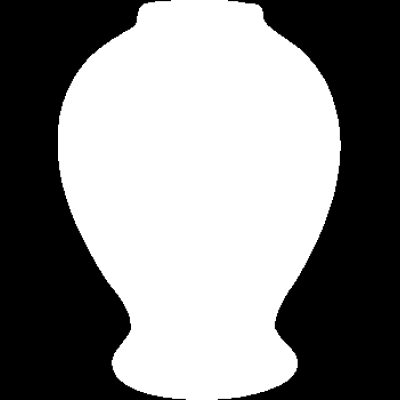

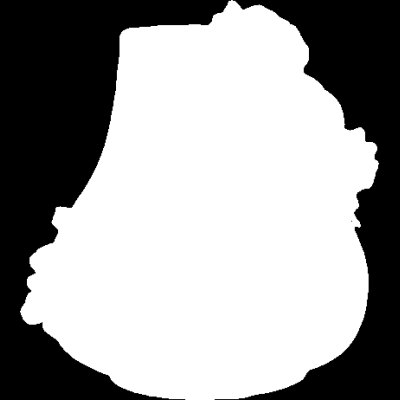

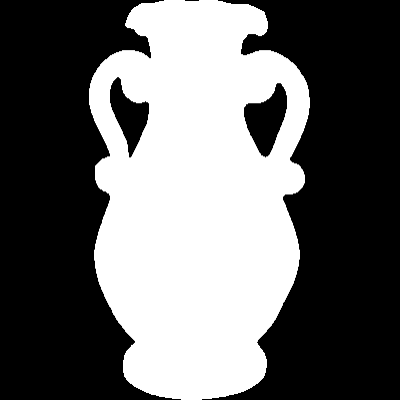

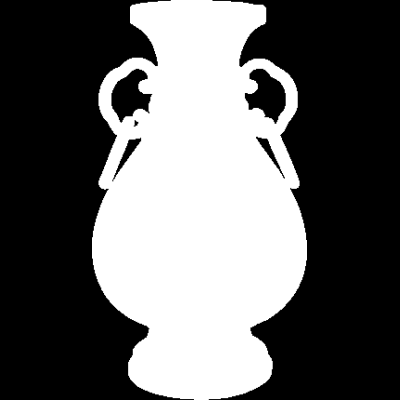

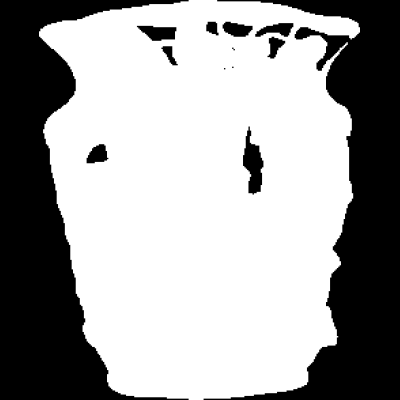

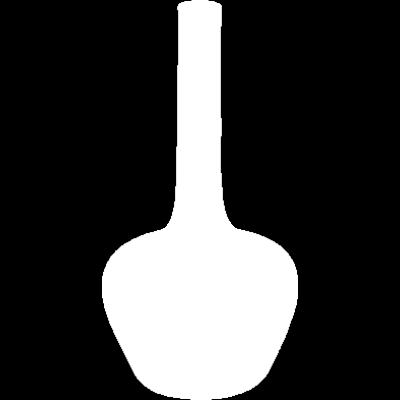

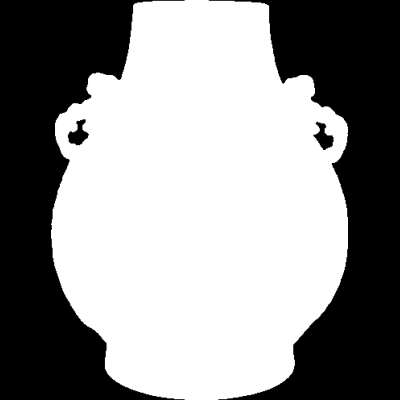

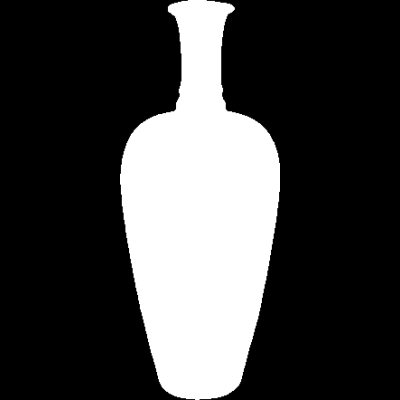

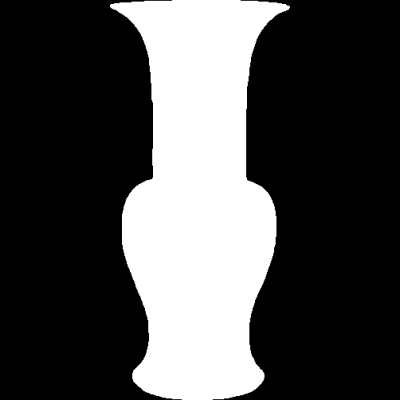

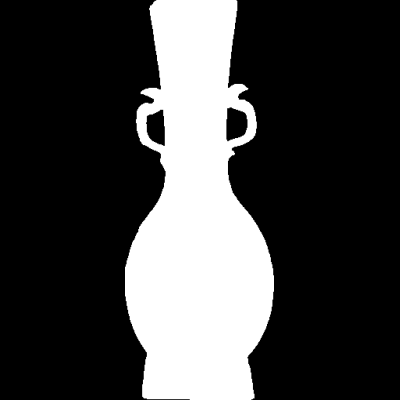

In [8]:
for path in image_paths[:10]:
    # norm = normalize_image_to_pixel_array(path)

    # Convert back to a 2D array of shape (200, 200)
    # output_size = (400, 400)
    # image_array = np.array(norm, dtype=np.uint8).reshape(output_size)

    # Create and display PIL image
    # img = Image.fromarray(image_array, mode='L')  # 'L' = 8-bit grayscale
    img = get_display_normalized_image(path)
    display(img)

In [9]:
# def sort_images_pca(folder_path='../public/data/images'):
#     # Step 1: Load and normalize images
#     all_files = sorted(os.listdir(folder_path))
#     image_paths = [os.path.join(folder_path, f) for f in all_files if f.lower().endswith((".png"))]
   

#     # Filter using is_valid_mask
#     valid_image_paths = [path for path in image_paths if is_valid_mask(path)]

#     normalized_images = [normalize_image_to_pixel_array(path) for path in valid_image_paths[:100]]
 
#     pca = PCA(n_components=100)
#     vase_pca = pca.fit_transform(normalized_images)
#     pca_df = pd.DataFrame(vase_pca)

#     # print("explained variance:", pca.explained_variance())
#     # print("common values V", pca.components.shape)
#     # print("Resulting DataFrame:", vase_pca.shape[0], "rows and", vase_pca.shape[1], "features (principal components)")

#     # Step 4: Sort by similarity to the first image (index 0)
#     dist_matrix = squareform(pdist(pca_df.values, metric='euclidean'))
#     reference_index = 0
#     sorted_indices = np.argsort(dist_matrix[reference_index])

#     # Step 5: Sort the image paths using the indices
#     sorted_filenames = [os.path.basename(image_paths[i]) for i in sorted_indices]

#     return sorted_filenames


In [10]:
# sorted_filenames = sort_images_pca()
# sorted_filenames

In [11]:
# save_to_json(sorted_filenames)

In [12]:
def cluster_pca_images(pca_df, valid_image_paths, n_clusters=10):
# Step 4: KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(pca_df)

    # Step 5: Group filenames by cluster
    clustered_results = {
        cluster: [] for cluster in range(n_clusters)
    }

    for i, label in enumerate(cluster_labels):
        clustered_results[label].append(os.path.basename(valid_image_paths[i]))

    return clustered_results

In [13]:
pca_df, valid_image_paths = get_images_pca()

In [14]:
pca_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-13687.569789,-10879.863359,-9859.333291,3955.357230,-600.806274,708.967437,-5934.186458,7684.672917,479.222830,-5577.352853,...,3067.993998,955.527935,644.294490,1810.162043,-412.827089,942.642638,-74.173782,1664.550780,-653.749240,1079.460030
1,-12018.413850,-2372.369259,-473.062892,-9171.305604,2210.890723,-5765.006237,-4652.424768,-819.862701,1022.273407,1273.115182,...,-650.710805,-2174.758191,-880.554108,-2869.984057,2875.640935,-508.865309,-2120.560443,957.806873,2162.070861,901.734241
2,-15838.187543,13901.666493,50.416779,-2844.805965,11829.158125,2676.346367,-2022.290480,247.639157,1289.873676,7479.291387,...,-1312.786292,284.581100,-365.003357,-2145.088184,578.345304,-2376.120269,1096.878156,-265.443789,205.596971,-958.481218
3,-15506.137829,-13281.444101,-12442.594866,9614.731498,-8444.407426,3504.530926,2727.739400,4726.680616,6022.770357,-5676.287348,...,1290.675189,-219.747431,-778.653950,-2918.513565,1001.948772,-388.421864,2288.763194,-27.606047,-650.695218,-528.914988
4,-6612.218992,-18874.942851,-5330.061036,-3242.836084,-5116.687412,5273.656615,-3996.349817,2827.666931,-1036.701350,-1711.381607,...,-152.109172,33.780383,1118.735830,411.631927,-417.154961,-464.434933,585.780901,750.519646,-553.446820,-297.755914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,30425.008016,-2624.991589,-9103.170128,-2406.163739,9612.626157,-748.977677,3682.260874,-11742.420902,9290.325874,-7516.584694,...,-217.309596,1837.499936,177.702819,572.860342,546.817381,1636.512908,615.827552,-114.492871,689.448441,-125.368515
711,28112.362103,-6232.168523,-7807.176250,-2517.580044,10807.584233,-1120.630329,6815.304850,-12063.921997,9375.256095,-5277.528746,...,-1134.866014,2169.045171,-2424.863722,-176.448358,1403.821876,1625.397472,-735.208023,526.707476,-259.071674,-577.336953
712,-17537.426291,-5842.527374,-6695.679132,-8092.526266,-5814.880780,-1267.931360,-4774.924882,-3438.327294,-2677.576499,-5281.492276,...,-30.463252,-320.458547,507.073538,-519.730668,601.530102,-51.019312,-1156.336114,778.060327,286.626975,70.459872
713,-18337.210916,-4932.052979,-7270.906645,-7985.292119,-5594.112412,-1354.616972,-4369.936627,-3952.638968,-2747.500670,-5065.082998,...,171.823485,-723.588765,-447.721070,-155.297876,-94.542300,55.869093,-599.020188,558.178766,637.382064,-792.763875


In [15]:
valid_image_paths

['../public/data/images/1029mask.png',
 '../public/data/images/13456mask.png',
 '../public/data/images/13528mask.png',
 '../public/data/images/14273mask.png',
 '../public/data/images/14318mask.png',
 '../public/data/images/14319mask.png',
 '../public/data/images/14344mask.png',
 '../public/data/images/14495mask.png',
 '../public/data/images/14498mask.png',
 '../public/data/images/14499mask.png',
 '../public/data/images/14503mask.png',
 '../public/data/images/14510mask.png',
 '../public/data/images/1524mask.png',
 '../public/data/images/15303mask.png',
 '../public/data/images/1531mask.png',
 '../public/data/images/15547mask.png',
 '../public/data/images/15595mask.png',
 '../public/data/images/15980mask.png',
 '../public/data/images/15982mask.png',
 '../public/data/images/16001mask.png',
 '../public/data/images/16544mask.png',
 '../public/data/images/16579mask.png',
 '../public/data/images/16755mask.png',
 '../public/data/images/17495mask.png',
 '../public/data/images/17731mask.png',
 '.

In [16]:
clustered_results = cluster_pca_images(pca_df, valid_image_paths, n_clusters=10)

In [17]:
cluster_list = [filename for filenames in clustered_results.values() for filename in filenames]

In [18]:
cluster_list

['1029mask.png',
 '14273mask.png',
 '15982mask.png',
 '19869mask.png',
 '199500mask.png',
 '20148mask.png',
 '204075mask.png',
 '204620mask.png',
 '205426mask.png',
 '206742mask.png',
 '208152mask.png',
 '21355mask.png',
 '238867mask.png',
 '37407mask.png',
 '40633mask.png',
 '40744mask.png',
 '41919mask.png',
 '42126mask.png',
 '42205mask.png',
 '42206mask.png',
 '42250mask.png',
 '42251mask.png',
 '43264mask.png',
 '460766mask.png',
 '461266mask.png',
 '46915mask.png',
 '50349mask.png',
 '52937mask.png',
 '52938mask.png',
 '623442mask.png',
 '623467mask.png',
 '623475mask.png',
 '623476mask.png',
 '658683mask.png',
 '658687mask.png',
 '667481mask.png',
 '702895mask.png',
 '771052mask.png',
 '9196mask.png',
 '9203mask.png',
 '9204mask.png',
 '9209mask.png',
 '9211mask.png',
 '9212mask.png',
 '9234mask.png',
 '9240mask.png',
 '9272mask.png',
 '9364mask.png',
 '9394mask.png',
 '9480mask.png',
 '9481mask.png',
 '9488mask.png',
 '9489mask.png',
 '9500mask.png',
 '9501mask.png',
 '9506mask

In [19]:
save_to_json(cluster_list)